On my honor, as a student, I have neither given nor received unauthorized aid on this academic work. The assignment I am submitting contains my own
words without borrowing other people’s words from the Internet or other sources(e.g., articles, lecture notes).

# Auto.csv

In [2]:
# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression
import re
#csv
import csv
# Excel format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
review = []
openfile = open('data/auto.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()
review


[['ETC: These are the overloaded cars of South Korean workers fleeing North Korea Filed under: Government/Legal , South Korea Around 175 South Korean workers have been forced to pack up their belongings and leave a group of jointly operated factories in North Korea after tensions continued to escalate between the two countries. The workers piled tools and finished products high onto the roofs of regular passenger cars as they evacuated as quickly as possible. North Korea says the ongoing talks with its southern neighbor geared toward keeping the factory complex operational were "deceptive" given that the US and South Korean armed forces continue to practice joint drills nearby. South Korea , meanwhile, was concerned that workers could be deprived of food or medicine if the situation continued to sour. The evacuation has placed the future of factories operated jointly by the two countries into question and marks the most significant casualty of the continued degradation of relations bet

In [3]:
# currently the data are in list ... convert to string
tokens = str(review)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)

#tokenization or word split
tokens = word_tokenize(tokens)
#Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))
#add additional stopwrods
more_stopwords = set(('report', 'permalink', 'ago', 'hour', 'year', 'abuse','the', 'and'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())

#remove short words
tokens = (word for word in tokens if len(word) >= 3)


#Create your bigrams ... bigrams are two tokens
#bgs = nltk.bigrams(tokens)

In [6]:
#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(tokens)
fdist

FreqDist()

In [5]:
# prepare the results of word frequency on auto data as a list

freq_word = []

# two values or columns in fdist_a
for k,v in fdist.items():
    freq_word.append([k,v])

#make it like an Excel worksheet
wordlist = pd.DataFrame(freq_word)
wordlist = wordlist.rename(columns={0: 'word_auto', 1: 'freq_auto'})



In [6]:
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html
wordlist = wordlist.rename(columns={0: 'word_auto', 1: 'freq_auto'})
wordlist.to_csv("data/auto_worldlist.csv")

In [7]:
# least popular words
wl = wordlist.sort_values('freq_auto', ascending=True)
wl.head()


,word_auto,freq_auto
0,dynamic,1
800,spain,1
803,returning,1
804,mph,1
806,surprise,1


In [8]:
# most popular words
wd = wordlist.sort_values('freq_auto', ascending=False)
print wd.head(10)


     word_auto  freq_auto
1178     video         77
832      hours         64
1364  mercedes         58
33         new         53
446        car         44
1460      like         44
372    concept         40
996        see         40
1366  autoblog         34
161     boston         33


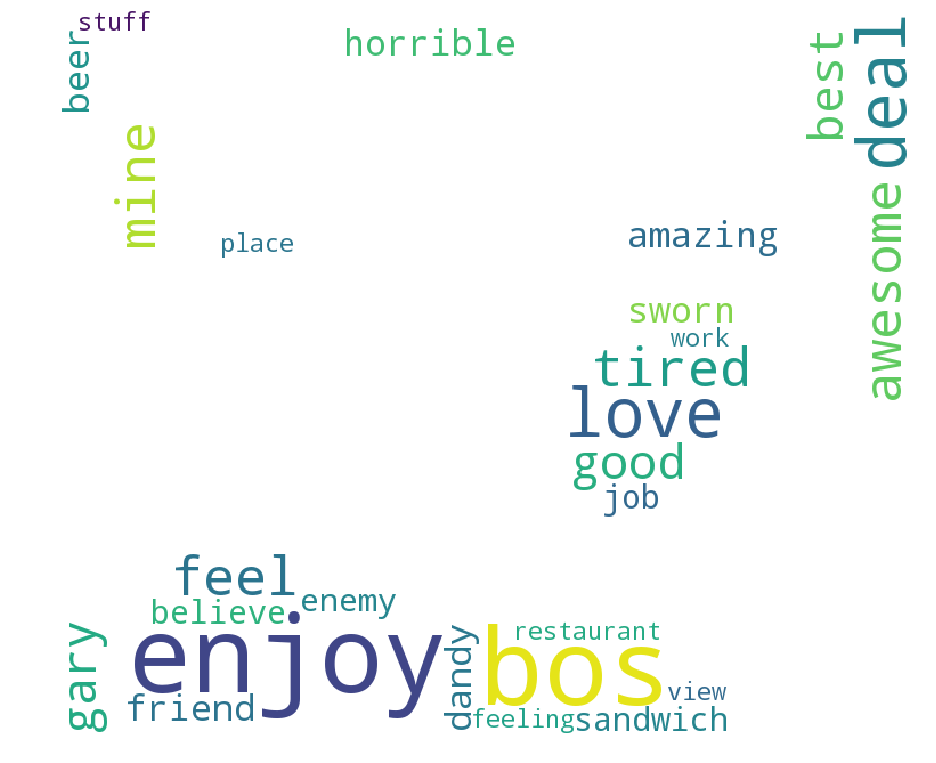

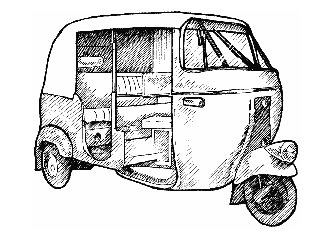

In [9]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

d = path.dirname("data/examples/")

# Read the whole text.
text = open(path.join(d, 'worldlist_auto.txt')).read()
#additional stopwrods
more_stopwords = set(('cant', 'aint', 'today'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)

stopwords = set(STOPWORDS)
stopwords.add("report")
stopwords.add("permalink")
stopwords.add("ago")
stopwords.add("hour")
stopwords.add("year")
stopwords.add("abuse")
# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
auto_mask = np.array(Image.open(path.join(d, "auto.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=auto_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# show
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")

plt.figure()
plt.imshow(auto_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.savefig("data/auto.png")
plt.savefig("data/auto.pdf")

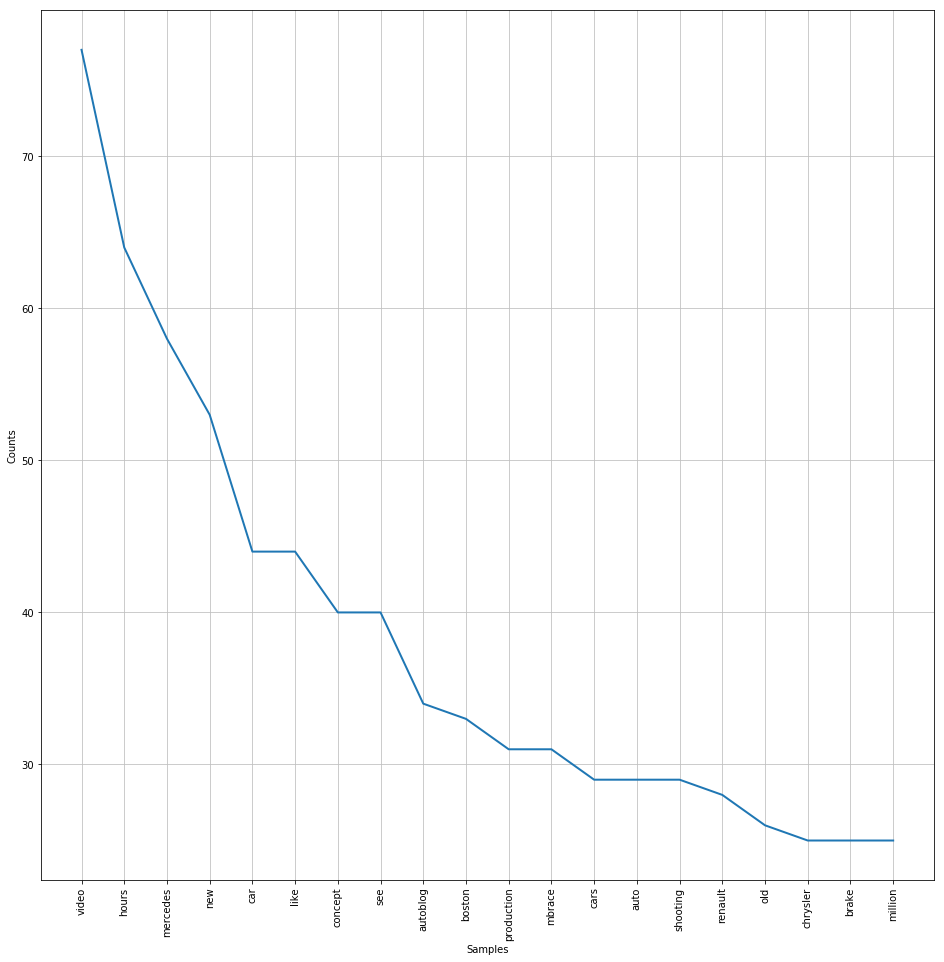

In [10]:
plt.figure(figsize=(16,16))
fdist.plot(20)

In [11]:
# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression
import re
#csv
import csv
# Excel format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline

review = []
openfile = open('data/auto.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

# what if you have additional stopwords to be removed
tokens = str(review)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#add additional stopwrods
more_stopwords = set(('report', 'permalink', 'ago', 'hour', 'year', 'abuse','the', 'and'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist_b = nltk.FreqDist(bigrams)




In [15]:
freq_word = []

# two values or columns in fdist_a
for s,e in fdist_b.items():
    freq_word.append([s,e])

#make it like an Excel worksheet
wordlist = pd.DataFrame(freq_word)
wordlist = wordlist.rename(columns={0: 'word_auto', 1: 'freq_auto'})
wordlist

dr = wordlist.sort_values('freq_auto', ascending=False)
dr.head(10)

,word_auto,freq_auto
89,"(shooting, brake)",26
2286,"(mercedes, mbrace)",20
504,"(new, york)",20
802,"(mercedes, benz)",17
880,"(porsche, cayman)",17
2321,"(roll, royce)",15
1302,"(nip, tuck)",15
473,"(nine, speed)",15
1928,"(getting, nip)",15
2770,"(north, korea)",15


In [13]:
# Q1. how many rows are in the politics folder
count = len(open(r"data/auto.csv", 'rU').readlines())
print count   

8


# Finance.Csv

In [16]:
review = []
openfile = open('data/finance.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

In [17]:
# Q1. how many rows are in the finance folder
count = len(open(r"data/finance.csv", 'rU').readlines())
print count

10


In [18]:
# what if you have additional stopwords to be removed
tokens = str(review)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#add additional stopwrods
more_stopwords = set(('report', 'permalink', 'ago', 'hour', 'year', 'abuse','the', 'and'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)
#Create your bigrams ... a bigram are a pair of two tokens
bigrams = nltk.bigrams(tokens)
#compute frequency distribution for all the bigrams in the text
fdist_bi = nltk.FreqDist(bigrams)


In [19]:
# prepare the results of word frequency on auto data as a list

freq_word = []

# two values or columns in fdist_a
for k,v in fdist_bi.items():
    freq_word.append([k,v])

#make it like an Excel worksheet
wordlist = pd.DataFrame(freq_word)
wordlist = wordlist.rename(columns={0: 'word_finance', 1: 'freq_finance'})
wordlist

da = wordlist.sort_values('freq_finance', ascending=False)
da.head(10)


,word_finance,freq_finance
2458,"(college, football)",22
2573,"(super, bowl)",20
2731,"(ncaa, fumble)",18
3012,"(ipo, price)",18
46,"(football, team)",18
1545,"(stock, slammed)",18
509,"(correction, loom)",18
3264,"(first, day)",18
623,"(official, correction)",18
2198,"(fumble, college)",18


In [20]:
# import nltk (natural language tool kit), a popular python package for text mining
import nltk
# stopwords, FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
#regular expression
import re
#csv
import csv
# Excel format
import pandas as pd
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline
review = []
openfile = open('data/finance.csv', 'rb')
r = csv.reader(openfile)
for i in r:
# get the first column only (ignoring the second column)
    review.append(i)    
openfile.close()

In [21]:
tokens = str(review)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)

#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
more_stopwords = set(('report', 'permalink', 'ago', 'hour', 'year', 'abuse','the', 'and'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)


#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(tokens)
fdist 


freq_word = []

# two values or columns in fdist_a
for s,f in fdist.items():
    freq_word.append([s,f])

#make it like an Excel worksheet


wordlist = pd.DataFrame(freq_word)
wordlist = wordlist.rename(columns={0: 'word_finance', 1: 'freq_finance'})

df_1 = wordlist.sort_values('freq_finance', ascending=False)
df_1.head(10)


,word_finance,freq_finance
1256,stock,118
827,share,92
416,ipo,80
816,company,79
418,market,52
500,million,51
1176,facebook,50
558,price,48
782,public,48
475,finance,41


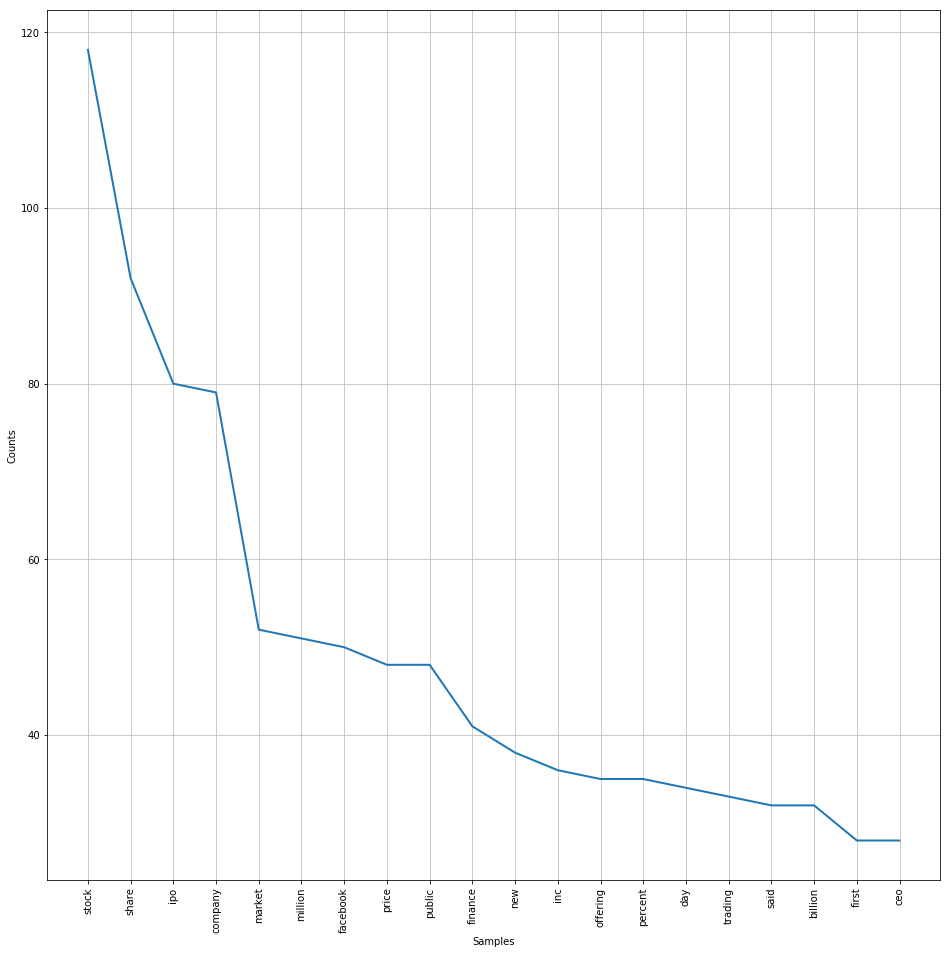

In [22]:
plt.figure(figsize=(16,16))
fdist.plot(20)

In [23]:
# save the results of word frequency
output = open("data/finance_fdist.csv", "wb") 
w = csv.writer(output)
w.writerows(fdist.items())
output.close()

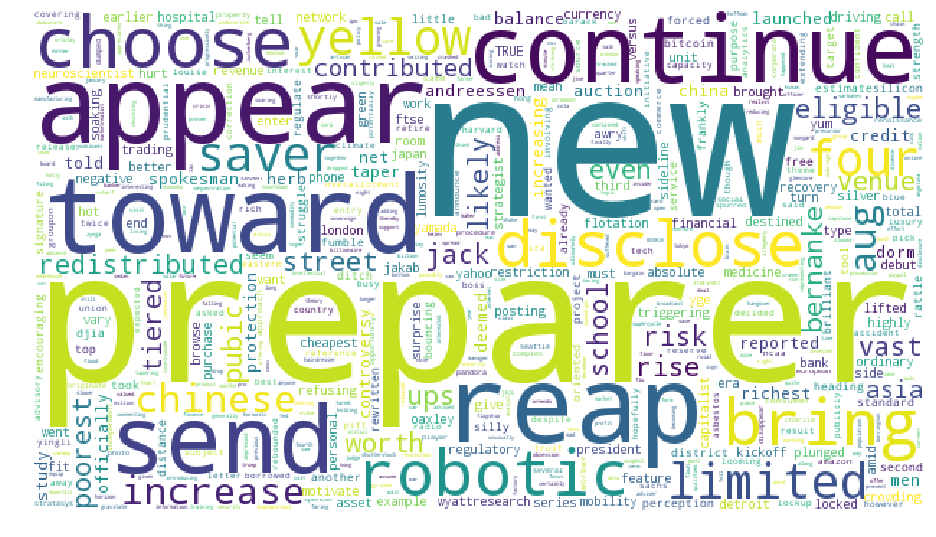

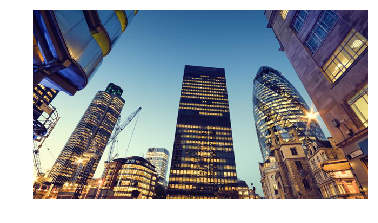

In [24]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

d = path.dirname("data/examples/")

# Read the whole text.
text = open(path.join(d, 'finance_wordlist.txt')).read()

stopwords = set(STOPWORDS)
stopwords.add("report")
stopwords.add("include")
stopwords.add("the")
stopwords.add("are")
stopwords.add("from")
stopwords.add("abuse")

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
finance_mask = np.array(Image.open(path.join(d, "finance.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=finance_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text)

# show
plt.figure(figsize=(16,16))
plt.imshow(wc)
plt.axis("off")

plt.figure()
plt.imshow(finance_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.savefig("data/finance.png")
plt.savefig("data/finance.pdf")